In [2]:
import numpy as np
import matplotlib.pyplot as plt

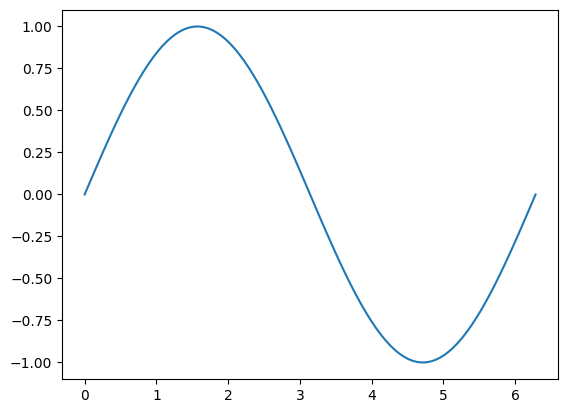

In [3]:
T = 100
x1 = np.linspace(0, 2 * np.pi, T)
y1 = np.sin(x1)
plt.plot(x1, y1)

In [4]:
seq_len = 5
X = []
Y = []
for i in range(len(x1) - seq_len):
  X.append(y1[i : i + seq_len])
  Y.append(y1[i + seq_len])
X = np.array(X)
Y = np.array(Y)
X = X.reshape(-1, seq_len, 1)
Y = Y.reshape(-1, 1)


In [14]:
hidden_size = 10
input_size = 1
output_size = 1

np.random.seed(50)
W = np.random.randn(hidden_size, hidden_size) * 0.1
U = np.random.randn(hidden_size, input_size) * 0.1
V = np.random.randn(output_size, hidden_size) * 0.1
b = np.zeros((hidden_size, 1))
c = np.zeros((output_size, 1))

In [6]:
def tanh(x):
  return np.tanh(x)

In [7]:
def d_tanh(x):
  return 1 - np.tanh(x) ** 2

In [70]:
epochs = 1000
lr = 0.001

for epoch in range(epochs):
  loss = 0
  for i in range(len(X)):
    seq = X[i]
    y_true = Y[i]
    a = np.zeros((len(seq), hidden_size, 1))
    h = np.zeros((len(seq), hidden_size, 1))
    prev_h = np.zeros((hidden_size, 1))
    for j in range(0, len(seq)):
      a[j] = W @ prev_h + U @ seq[j].reshape(-1, 1) + b
      h[j] = tanh(a[j])
      prev_h = h[j]
    y_pred = V @ h[-1] + c
    d_W = np.zeros_like(W)
    d_V = np.zeros_like(V)
    d_U = np.zeros_like(U)
    d_b = np.zeros_like(b)
    d_c = np.zeros_like(c)
    d_y = (y_pred - y_true)
    d_h_next = np.zeros_like(h[0])
    loss = loss + d_y.item()
    for j in reversed(range(len(seq))):
      d_V = d_V + d_y @ h[j].T
      d_c = d_c + d_y
      d_h = V.T @ d_y + d_h_next
      d_a = d_h * d_tanh(h[j])
      d_W = d_W + 0 if (j == 0) else d_a @ h[j - 1].T
      d_U = d_U + d_a @ seq[j].reshape(-1, 1).T
      d_b = d_b + d_a
      d_h_next = W.T @ d_a
    for grad in [d_U, d_W, d_V, d_b, d_c]:
      np.clip(grad, -1, 1, out=grad)
    W = W - lr * d_W
    V = V - lr * d_V
    U = U - lr * d_U
    b = b - lr * d_b
    c = c - lr * d_c
  if (epoch % 10 == 0):
    print("epoch: ", epoch, "loss: ", loss / len(X))

epoch:  0 loss:  6.152796686699564e-07
epoch:  10 loss:  6.010117847847715e-07
epoch:  20 loss:  5.847282040058319e-07
epoch:  30 loss:  5.663396747293694e-07
epoch:  40 loss:  5.457549752107519e-07
epoch:  50 loss:  5.228809650618875e-07
epoch:  60 loss:  4.976226436812386e-07
epoch:  70 loss:  4.6988321479839095e-07
epoch:  80 loss:  4.3956415645550106e-07
epoch:  90 loss:  4.065652991021369e-07
epoch:  100 loss:  3.707849077815821e-07
epoch:  110 loss:  3.3211977240146355e-07
epoch:  120 loss:  2.9046530336777825e-07
epoch:  130 loss:  2.457156323231706e-07
epoch:  140 loss:  1.977637207616579e-07
epoch:  150 loss:  1.4650147272386362e-07
epoch:  160 loss:  9.181985374280628e-08
epoch:  170 loss:  3.36090145361839e-08
epoch:  180 loss:  -2.82415795547687e-08
epoch:  190 loss:  -9.384301580072027e-08
epoch:  200 loss:  -1.6330679507263394e-07
epoch:  210 loss:  -2.3674469078705548e-07
epoch:  220 loss:  -3.1426860318948724e-07
epoch:  230 loss:  -3.959904105643438e-07
epoch:  240 los

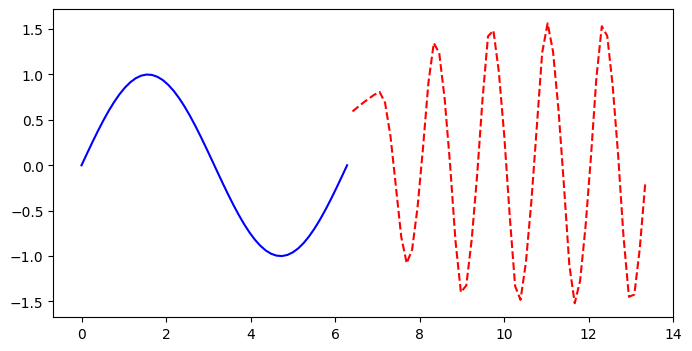

In [73]:
test_seq = X[10]
for i in range(50):
  for j in range(len(test_seq)):
    a = W @ prev_h + U @ test_seq[j].reshape(-1, 1) + b
    h = tanh(a)
    prev_h = h
  y_pred = V @ h + c

  test_seq = np.concatenate((test_seq, y_pred.T), axis = 0)
y_pred = test_seq
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)
dx = x[1] - x[0]
x_pred = np.linspace(2 * np.pi + dx, 2 * np.pi + dx * len(y_pred), len(y_pred))